In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import gzip

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

### Facebook data
#### The following function reads a file with one edge per line, specified by two integer node IDs.

In [2]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [3]:
# https://snap.stanford.edu/data/facebook_combined.txt.gz

fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

#### With larger graphs, it takes too long to compute clustering coefficients, but we can estimate them by sampling. NetworkX provides a function in its approximation module that estimates the clustering coefficient:

In [4]:
from networkx.algorithms.approximation import average_clustering

In [5]:
C = average_clustering(fb)
C

0.579

#### With larger graphs, it takes too long to compute path lengths, but we can estimate them by sampling. 

In [6]:
def sample_path_lengths(G, nodes=None, trials=1000):
    """Choose random pairs of nodes and compute the path length between them.

    G: Graph
    nodes: list of nodes to choose from
    trials: number of pairs to choose

    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
        
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair) 
               for pair in pairs]
    return lengths

def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

In [7]:
L = estimate_path_length(fb)
L

3.717

## Degree Distribution

### But let's look at the degree distribution.

### The following function returns a list of degrees, one for each node:

In [3]:
colored_degree(G1, color)

NameError: name 'G1' is not defined

In [8]:
def degrees(G):
    """List of degrees for nodes in `G`.
    
    G: Graph object
    
    returns: list of int
    """
    return [G.degree(u) for u in G]

In [9]:
print(f"The mean degree of the facebook network is {np.mean(degrees(fb))}")

The mean degree of the facebook network is 43.69101262688784


In [10]:
print(f"The standard deviation of the degrees of the facebook network is {np.std(degrees(fb))}")

The standard deviation of the degrees of the facebook network is 52.41411556737521


### FaceBook: Drawing Degree Distribution

In [11]:
from empiricaldist import Pmf ## pip install empiricaldist - PMF - Probability Mass Function

A `Pmf` object maps from each degree to the fraction of nodes with that degree.

In [12]:
pmf_fb = Pmf.from_seq(degrees(fb))
for i in range (1,11):
    print(f"{pmf_fb[i]*100}% of the nodes have {i} neighbors")


1.8568952711067097% of the nodes have 1 neighbors
2.4263431542461005% of the nodes have 2 neighbors
2.30255013617232% of the nodes have 3 neighbors
2.4511017578608567% of the nodes have 4 neighbors
2.30255013617232% of the nodes have 5 neighbors
2.4263431542461005% of the nodes have 6 neighbors
2.4263431542461005% of the nodes have 7 neighbors
2.74820500123793% of the nodes have 8 neighbors
2.475860361475613% of the nodes have 9 neighbors
2.352067343401832% of the nodes have 10 neighbors


In [13]:
pmf_fb

,probs
1,0.018569
2,0.024263
3,0.023026
4,0.024511
5,0.023026
...,...
347,0.000248
547,0.000248
755,0.000248
792,0.000248


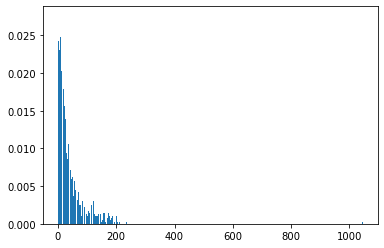

In [14]:
pmf_fb.bar()

In [15]:
pmf_fb = Pmf.from_seq(degrees(fb))
pmf_fb.mean(), pmf_fb.std()

(43.69101262688785, 52.41411556737521)

### We can also use the Pmf to look up the fraction of nodes with exactly 1 neighbor.

In [16]:
pmf_fb[1] ## 18.56895 of the nodes have 1 neighbor

0.018568952711067097

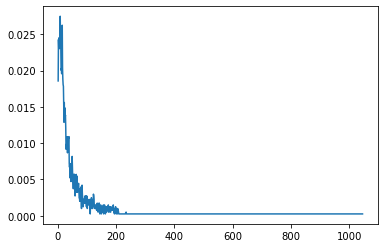

In [17]:
pmf_fb.plot(label='Facebook', color='C0')

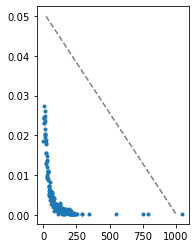

In [18]:
options = dict(ls='', marker='.')

plt.subplot(1,2,1)
plt.plot([20, 1000], [5e-2, 2e-4], color='gray', linestyle='dashed')

pmf_fb.plot(label='Facebook', color='C0', **options)

## Cumulative distributions

### Cumulative distributions are a better way to visualize distributions.  The following function shows what a cumulative probability is:

In [19]:
def cumulative_prob(pmf, x):
    """Computes the cumulative probability of `x`.
    
    Total probability of all values <= x.
    
    returns: float probability
    """
    ps = [pmf[value] for value in pmf.qs if value<=x]
    return np.sum(ps)

### Cumulative Probability of Users and their degrees

In [20]:
cumulative_prob(pmf_fb,11) ### 25% of all users have 11 or fewer friends

0.2577370636296113

In [21]:
cumulative_prob(pmf_fb,25) ### 50% of all users have 25 or fewer friends

0.5060658578856152

In [22]:
cumulative_prob(pmf_fb, 57) ### And the 75th percentile is about 57. That is, about 75% of users have 57 friends or fewer.

0.751671205743996

`empiricaldist` provides `Cdf`, which computes cumulative distribution functions.

In [23]:
from empiricaldist import Cdf

Here are the degree CDFs for the Facebook data

In [24]:
cdf_fb = Cdf.from_seq(degrees(fb), name='Facebook')

If we plot them on a log-x scale, we get a sense of how well the model fit the central part of the distribution.

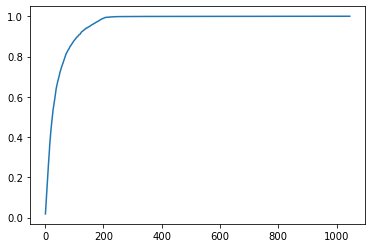

In [25]:
cdf_fb.plot(color='C0')

<AxesSubplot:>

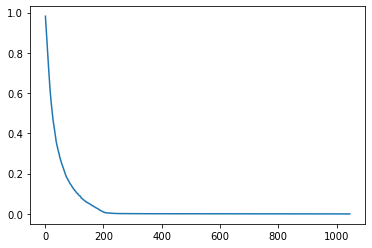

In [26]:
(1 - cdf_fb).plot(color='C0')